In [87]:
import pandas as pd
csv = pd.read_csv('candy-data.csv')

In [88]:
#convert winpercent to decimal
csv['winpercent'] = csv['winpercent'] / 100
csv

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate-prediction,win-prediction
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,0.669717,0,0.5801
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029,0,0.2483
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611,1,0.5098
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0.461165,1,0.7404
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415,1,0.4046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,0.454663,1,0.4665
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,0.390119,1,0.1150
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,0.443755,0,0.0420
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,0.419043,1,0.3234


In [89]:
#mse error 
from sklearn.metrics import mean_squared_error, accuracy_score

#prediction error chocolate prediction
chocolate_accuracy = accuracy_score(csv['chocolate'], csv['chocolate-prediction'])
chocolate_error_rate = 1 - chocolate_accuracy
print("chocolate inaccuracy/error rate: ", chocolate_error_rate)

#win prediction :


#mse error
win_mse_win = mean_squared_error(csv['winpercent'], csv['win-prediction'])

print("winpercent mse error: ", win_mse_win)

chocolate inaccuracy/error rate:  0.5176470588235293
winpercent mse error:  0.09028975691020778


the variance is 0.02165123140895105 and the standard deviation is 0.14714357413407847


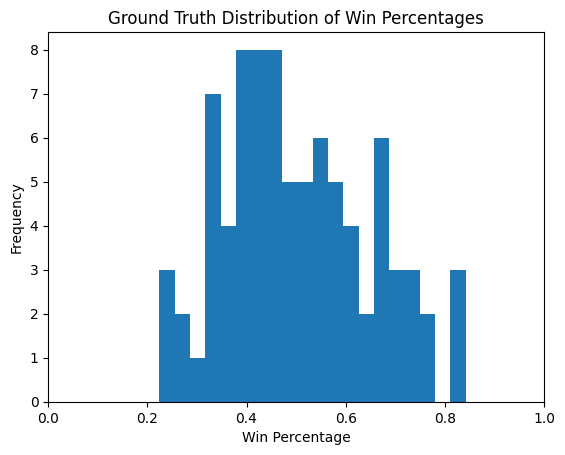

In [90]:
#plot distribution of winpercent 
import matplotlib.pyplot as plt
plt.hist(csv['winpercent'], bins=20)
plt.title('Ground Truth Distribution of Win Percentages')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
#set xlimits
plt.xlim(0,1)
#the ground truth win-percent distribution has tail skewed to the right and not a normal distribution, so mse error may not be a very good error rate
#get variance
csv['winpercent'].var()
#standard deviation
csv['winpercent'].std()
print('the variance is {} and the standard deviation is {}'.format(csv['winpercent'].var(), csv['winpercent'].std()))

the variance is 0.0661067421792717 and the standard deviation is 0.25711231432833337


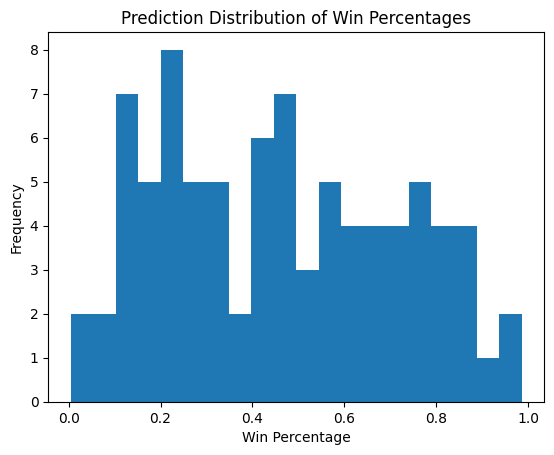

In [91]:
#stribution of win-prediction
plt.hist(csv['win-prediction'], bins=20)
plt.title('Prediction Distribution of Win Percentages')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
#variance of 
csv['win-prediction'].var()
#standard deviation
csv['win-prediction'].std()
print('the variance is {} and the standard deviation is {}'.format(csv['win-prediction'].var(), csv['win-prediction'].std()))

Explain what your error rate indicates about each model. Do you think the model is a good fit? Why or why not? 

Chocolate predition: (1 - accuracy)

mse doesn't make sense since not continuous, but discretized. Therefore, mse doesn't make sense since these values don't fall on a continuous scale of predictions, and since outputs are constrained to [0,1], there is no need to use mse since we won't have any predictions to penalize for being far offf the ttarget values. k
Simple is good, so...
Instead, we decided to calcuaie the accuracy (what proportion on the time the model was correct) and the subtract that from 1. This gives us the proportion of the time that the model deviated from the observed valued. When we calculated this, we got 0.518. This means that the model was innacurate approximately 51.8% of the time. We think that this model is not a good fit because it is inccorect more often than not.

Win prediction: (MSE)
The distribution of the ground truth win rates has less variance (~0.022) than the predicted values (~0.066), and there is a greater spread of win predictions than the ground truth that is mostly constrained within 0.2 to 0.8. 
MSE offers a penalty for predictions that are further off the target by squaring the differences, which may be an appropriate way to penalizing the greater spread of the predictions compared to the ground truth. By comparing the MSE to the variance, we can compare the performance of the model to what we'd get from a naive estimator that predicts the mean of the data points. 
MSE = 0.09...
variance of ground truth = 0.02, which can be interpreted as MSE if model were to just predict hte mean of winpercent
The MSE error is higher than the MSE error the model would get by just predicting the mean win percent. Therefore, the classifier may not be very robust. 